### 【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。<br>


In [2]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.14.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


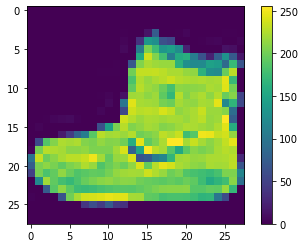

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0


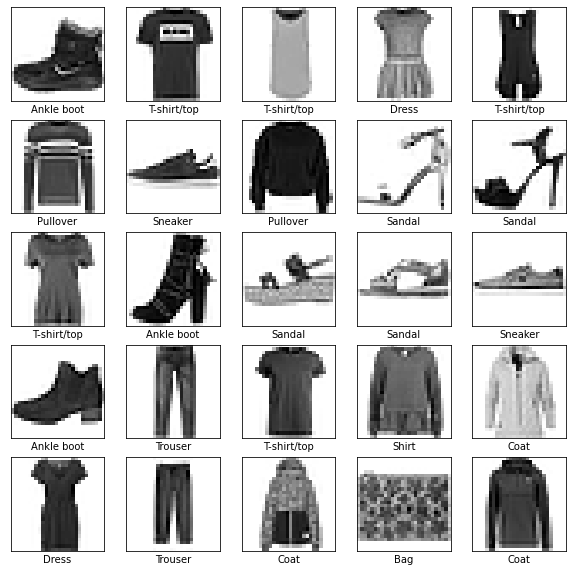

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.5043 - acc: 0.8228
Epoch 2/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3784 - acc: 0.8645
Epoch 3/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3392 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3133 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2945 - acc: 0.8903


In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/10000 - 0s - loss: 0.3720 - acc: 0.8628

Test accuracy: 0.8628


In [13]:
predictions = model.predict(test_images)


In [14]:
predictions[0]


array([2.0453246e-05, 7.9879257e-08, 3.3283708e-08, 9.6802557e-09,
       3.7064501e-06, 1.4865736e-02, 1.8558976e-05, 5.6778353e-02,
       7.9596083e-04, 9.2751718e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])


9

In [16]:
test_labels[0]


9

In [17]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


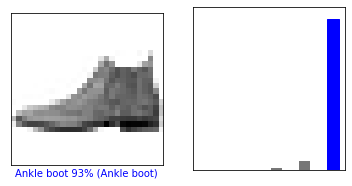

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


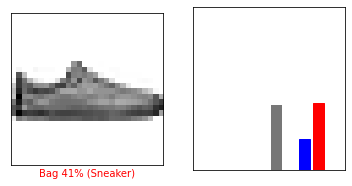

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


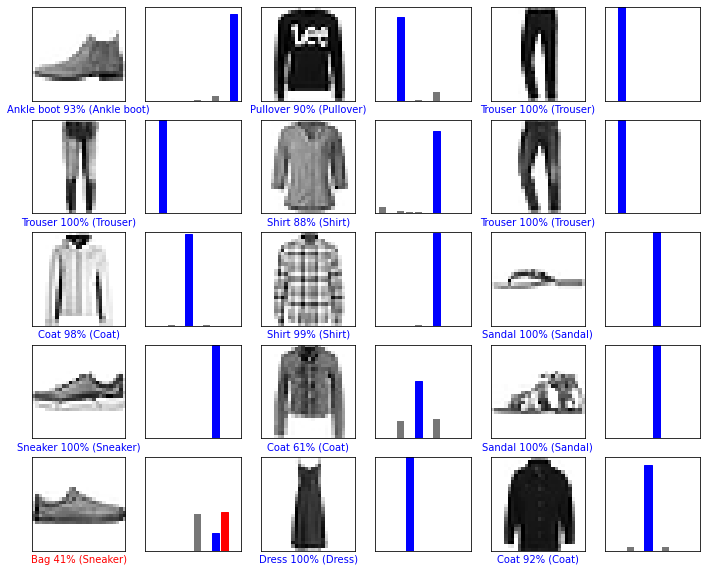

In [20]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示します。
# 正しい予測は青で、間違った予測は赤で表示しています。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [21]:
# テスト用データセットから画像を1枚取り出す
img = test_images[0]

print(img.shape)


(28, 28)


In [22]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [23]:
predictions_single = model.predict(img)

print(predictions_single)


[[2.0453281e-05 7.9878944e-08 3.3283637e-08 9.6802548e-09 3.7064463e-06
  1.4865748e-02 1.8558956e-05 5.6778360e-02 7.9596031e-04 9.2751706e-01]]


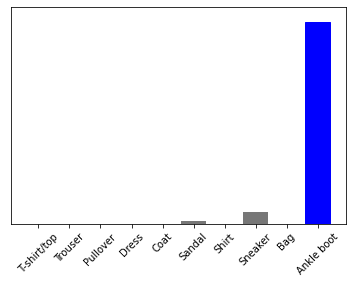

In [24]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [25]:
np.argmax(predictions_single[0])


9

### 【問題3】Iris（2値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。<br>


In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as K
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

#Preparing the dataset along with the variables and target
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# Convert labels to numbers
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(int)[:, np.newaxis]
# y = y.astype(np.int)[:, np.newaxis]

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Further splitting into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [51]:
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))


In [28]:
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#Compile the model
model.compile(loss='binary_crossentropy',
            #   optimizer=tf.optimizers.Adam(learning_rate=0.01),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

#Train the model
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 0s 2ms/sample - loss: 1.0786 - acc: 0.5938 - val_loss: 0.6188 - val_acc: 0.6250
Epoch 2/10
64/64 [==============================] - 0s 125us/sample - loss: 0.6484 - acc: 0.5938 - val_loss: 0.550

In [29]:
#Predictions
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())


y_pred_proba [0.08030048 0.99488044 0.07435071 0.99036527 0.8318482  0.9929911
 0.38283598 0.8121232  0.99489224 0.97009027 0.9598112  0.9782591
 0.9919095  0.20752665 0.02372739 0.03943843 0.5739916  0.02113739
 0.8456539  0.03320533]
y_pred [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
y_test [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [30]:
#Evaluiation of the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])


Train loss: 0.21190443634986877
Train accuracy: 0.9


### 【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。<br>


In [49]:
#Preparing the dataset along with the variables and target
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# Convert labels to numbers
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(int)[:, np.newaxis]
# y = y.astype(np.int)[:, np.newaxis]

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Further splitting into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

#Preprocessing / One-hot encoding of correct label value
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train)
y_val_one_hot = enc.transform(y_val)
y_test_one_hot = enc.transform(y_test)


In [32]:
#Model building
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))


In [33]:
model.summary()

#Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

#Training the model
history = model.fit(X_train, y_train_one_hot,
                    batch_size=10,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_val, y_val_one_hot))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Predictions
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())


y_pred_proba [4.4251109e-09 4.1114283e-03 9.9973446e-01 4.8856368e-08 9.9827564e-01
 4.6499245e-11 9.9897939e-01 2.0058067e-03 8.1383251e-04 1.2480448e-02
 3.8520992e-07 4.1487212e-03 9.4256602e-04 1.1051367e-03 6.8644958e-04
 9.9710304e-01 1.1050125e-03 8.7716285e-04 9.9671644e-01 9.9957973e-01
 2.3739422e-07 6.2536268e-04 9.9557340e-01 9.9516910e-01 7.0535600e-05
 9.9941349e-01 9.9795282e-01 5.6542670e-03 3.6379214e-02 9.9767965e-01]
y_pred [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [35]:
#Predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred)
print('y_test', y_test.ravel())


y_pred [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [36]:
# Evaluation of the model
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])


Train loss: 0.05268608778715134
Train accuracy: 1.0


### 【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。<br>


In [37]:
from sklearn.preprocessing import StandardScaler

#GEtting the dataset and preparing the variables and target
train = pd.read_csv('train.csv')

x = train[['GrLivArea', 'YearBuilt']]
y = train[['SalePrice']]

#Preparation of the variables and target / Preprocessing
x = np.log(x).values
y = np.log(y).values

sc = StandardScaler()
sc.fit_transform(x)

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Further splitting into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [38]:
#Model building
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(2,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))


In [39]:
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

#Compiling the model
model.compile(loss='mse',
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mse'])

#Training the model
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=20,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________
Train on 934 samples, validate on 234 samples
Epoch 1/20
934/934 [==============================] - 0s 143us/sample - loss: 4.3440 - mean_squared_error: 4.3440 - val_loss: 0.0701 - val_mean_squared_error: 0.0701
Epoch 2/20
934/934 [==============================] - 0s 71us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0720 - val_mean_squared_error: 0.0720
Epoch 3

In [40]:
#Predictions
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba
print("y_pred", y_pred.ravel()[:5])
print('y_test', y_test.ravel()[:5])


y_pred [12.253042  11.848378  11.619501  12.07359   11.5442915]
y_test [12.20918779 11.79810441 11.60823564 12.16525065 11.38509209]


In [41]:
#Evaluation of the model
score = model.evaluate(X_test, y_test, verbose=0)
print('loss (test):', score[0])
print('Mean Squared Error (test):', score[1])


loss (test): 0.13763462680659883
Mean Squared Error (test): 0.13763463


### 【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。<br>


In [47]:
# Download the MNIST dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#flatten
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Type conversion, normalization
X_train = X_train.astype(float)
X_test = X_test.astype(float)
# X_train = X_train.astype(np.float)
# X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

#Splitting into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

#Preprocessing of the target variable
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])


In [43]:
#Model building
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


In [44]:
model.summary()

#Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])

#Training the model
history = model.fit(X_train, y_train_one_hot,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, y_val_one_hot))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 42us/sample - loss: 0.2913 - acc: 0.9138 - val_loss: 0.2145 - val_acc: 0.9345
Epoch 2/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.1829 - acc: 0.9470 - val_loss: 0.1964 - val_acc: 0.9480
Epoch 3/5
48000/48000 [==============================] -

In [45]:
#Predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred[:10])
print('y_test', y_test.ravel()[:10])


y_pred [7 2 1 0 4 1 4 9 6 9]
y_test [7 2 1 0 4 1 4 9 5 9]


In [46]:
#Evaluation of the model
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.15653078104797752
Test accuracy: 0.961
